# Homework Starter — Stage 10a: Linear Regression

Use this as a scaffold if your project data isn’t ready. Replace the synthetic data section with your dataset when possible.

In [7]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as st

sns.set()
np.random.seed(7)

## 1) Load Project Dataset
- High-frequency financial data with trading behavior metrics
- Focus on modeling trading rate patterns and relationships

In [15]:
# Load the high-frequency trading dataset
df_raw = pd.read_csv('/Users/jay/bootcamp_Jingdong_Yang/project/data/high_frequency_data1.csv')

print("Missing values per column:")
print(df_raw.isnull().sum())

print("\nBasic statistics for numerical columns:")
numeric_cols = df_raw.select_dtypes(include=[np.number]).columns
print(df_raw[numeric_cols].describe())

feature_cols = [
    'S_LI_INITIATIVEBUYRATE',     # Initiative buy rate
    'S_LI_LARGEBUYRATE',          # Large buy rate  
    'S_LI_LARGESELLRATE',         # Large sell rate
    'S_LI_ENTRUSTRATE'            # Entrust rate
]
target_col = 'S_LI_INITIATIVESELLRATE'  # Initiative sell rate (our target)

# Remove rows with missing values in our selected columns
df_clean = df_raw[feature_cols + [target_col]].dropna()

print(f"\nAfter cleaning, dataset shape: {df_clean.shape}")
print(f"Removed {len(df_raw) - len(df_clean)} rows with missing values")

# Display correlation matrix
print("\nCorrelation matrix:")
correlation_matrix = df_clean.corr()
print(correlation_matrix)

# Create the final dataframe for modeling
df = df_clean.copy()
df.head()

Missing values per column:
Unnamed: 0                    0
index                         0
OBJECT_ID                     0
S_INFO_WINDCODE               0
TRADE_DT                      0
S_LI_INITIATIVEBUYRATE        0
S_LI_INITIATIVEBUYMONEY      23
S_LI_INITIATIVEBUYAMOUNT     26
S_LI_INITIATIVESELLRATE       1
S_LI_INITIATIVESELLMONEY      9
S_LI_INITIATIVESELLAMOUNT    12
S_LI_LARGEBUYRATE             1
S_LI_LARGEBUYMONEY            1
S_LI_LARGEBUYAMOUNT           1
S_LI_LARGESELLRATE            1
S_LI_LARGESELLMONEY           1
S_LI_LARGESELLAMOUNT          1
S_LI_ENTRUSTRATE              1
S_LI_ENTRUDIFFERAMOUNT        1
S_LI_ENTRUDIFFERAMONEY        1
S_LI_ENTRUSTBUYMONEY          1
S_LI_ENTRUSTSELLMONEY         1
S_LI_ENTRUSTBUYAMOUNT         1
S_LI_ENTRUSTSELLAMOUNT        1
OPDATE                        1
OPMODE                        1
dtype: int64

Basic statistics for numerical columns:
         Unnamed: 0         index      TRADE_DT  S_LI_INITIATIVEBUYRATE  \
count  33214

,S_LI_INITIATIVEBUYRATE,S_LI_LARGEBUYRATE,S_LI_LARGESELLRATE,S_LI_ENTRUSTRATE,S_LI_INITIATIVESELLRATE
0,0.4373,0.2749,0.2702,-41.8941,0.4397
1,0.3967,0.2762,0.3008,-38.2387,0.4142
2,0.3989,0.1698,0.3009,-22.1648,0.4872
3,0.4770,0.2365,0.1982,-23.7974,0.4012
4,0.4613,0.3141,0.2603,-24.7006,0.3378


## 2) Baseline Linear Regression Model
Modeling initiative sell rate as a function of trading behavior metrics.

In [11]:
# Prepare features and target
X = df[feature_cols]
y = df[target_col]

print("Feature variables:")
for i, col in enumerate(feature_cols):
    print(f"  X{i+1}: {col}")
print(f"\nTarget variable: {target_col}")

# Split into train/test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

print(f"\nTraining set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Fit linear regression model
lr = LinearRegression().fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'\nBaseline Model Performance:')
print(f'R² = {r2:.4f}')
print(f'RMSE = {rmse:.6f}')

# Display model coefficients
print(f'\nModel Coefficients:')
for i, (feature, coef) in enumerate(zip(feature_cols, lr.coef_)):
    print(f'  {feature}: {coef:.6f}')
print(f'Intercept: {lr.intercept_:.6f}')

Feature variables:
  X1: S_LI_INITIATIVEBUYRATE
  X2: S_LI_LARGEBUYRATE
  X3: S_LI_LARGESELLRATE
  X4: S_LI_ENTRUSTRATE

Target variable: S_LI_INITIATIVESELLRATE

Training set size: 26570
Test set size: 6643

Baseline Model Performance:
R² = 0.5567
RMSE = 0.058093

Model Coefficients:
  S_LI_INITIATIVEBUYRATE: -0.685732
  S_LI_LARGEBUYRATE: -0.135342
  S_LI_LARGESELLRATE: -0.024116
  S_LI_ENTRUSTRATE: -0.000004
Intercept: 0.786695


/Users/jay/miniconda3/envs/bootcamp_env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jay/miniconda3/envs/bootcamp_env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jay/miniconda3/envs/bootcamp_env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


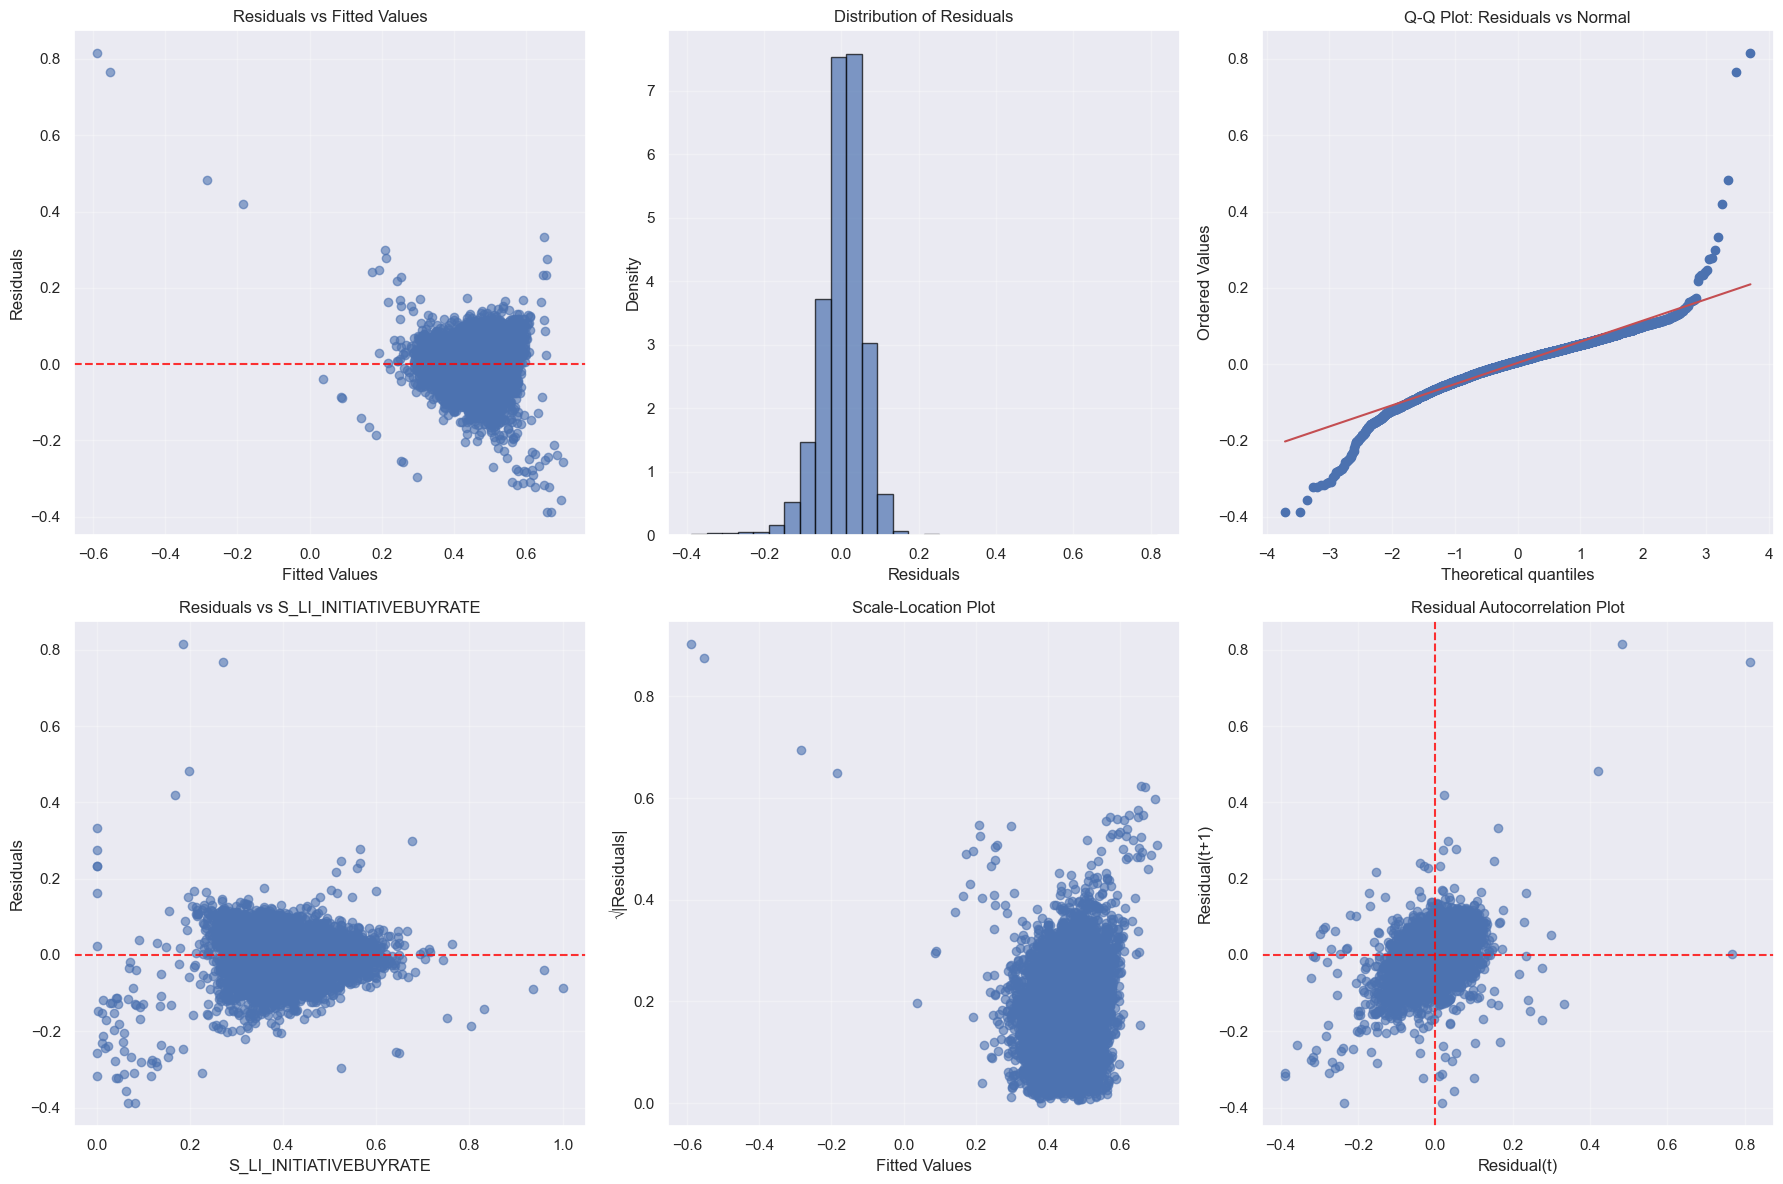

Statistical Tests for Assumptions:
Sample too large for Shapiro-Wilk test
Durbin-Watson statistic: 1.0591 (close to 2 indicates no autocorrelation)

Residual Summary Statistics:
Mean: 0.003037
Std Dev: 0.058013
Min: -0.388362
Max: 0.814902


In [12]:
# Calculate residuals
resid = y_test - y_pred
fitted = y_pred

# Create comprehensive diagnostic plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Residuals vs Fitted Values
axes[0,0].scatter(fitted, resid, alpha=0.6)
axes[0,0].axhline(0, ls='--', color='red', alpha=0.8)
axes[0,0].set_xlabel('Fitted Values')
axes[0,0].set_ylabel('Residuals')
axes[0,0].set_title('Residuals vs Fitted Values')
axes[0,0].grid(True, alpha=0.3)

# 2. Histogram of Residuals
axes[0,1].hist(resid, bins=30, density=True, alpha=0.7, edgecolor='black')
axes[0,1].set_xlabel('Residuals')
axes[0,1].set_ylabel('Density')
axes[0,1].set_title('Distribution of Residuals')
axes[0,1].grid(True, alpha=0.3)

# 3. QQ Plot for Normality
st.probplot(resid, dist='norm', plot=axes[0,2])
axes[0,2].set_title('Q-Q Plot: Residuals vs Normal')
axes[0,2].grid(True, alpha=0.3)

# 4. Residuals vs First Predictor (Initiative Buy Rate)
axes[1,0].scatter(X_test.iloc[:, 0], resid, alpha=0.6)
axes[1,0].axhline(0, ls='--', color='red', alpha=0.8)
axes[1,0].set_xlabel(feature_cols[0])
axes[1,0].set_ylabel('Residuals')
axes[1,0].set_title(f'Residuals vs {feature_cols[0]}')
axes[1,0].grid(True, alpha=0.3)

# 5. Scale-Location Plot (sqrt of absolute residuals vs fitted)
sqrt_abs_resid = np.sqrt(np.abs(resid))
axes[1,1].scatter(fitted, sqrt_abs_resid, alpha=0.6)
axes[1,1].set_xlabel('Fitted Values')
axes[1,1].set_ylabel('√|Residuals|')
axes[1,1].set_title('Scale-Location Plot')
axes[1,1].grid(True, alpha=0.3)

# 6. Residual Lag Plot (for independence check)
if len(resid) > 1:
    axes[1,2].scatter(resid[:-1], resid[1:], alpha=0.6)
    axes[1,2].axhline(0, ls='--', color='red', alpha=0.8)
    axes[1,2].axvline(0, ls='--', color='red', alpha=0.8)
    axes[1,2].set_xlabel('Residual(t)')
    axes[1,2].set_ylabel('Residual(t+1)')
    axes[1,2].set_title('Residual Autocorrelation Plot')
    axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional statistical tests
print("Statistical Tests for Assumptions:")
print("="*50)

# Shapiro-Wilk test for normality (if sample size allows)
if len(resid) <= 5000:
    from scipy.stats import shapiro
    shapiro_stat, shapiro_p = shapiro(resid)
    print(f"Shapiro-Wilk Normality Test: statistic={shapiro_stat:.4f}, p-value={shapiro_p:.6f}")
else:
    print("Sample too large for Shapiro-Wilk test")

# Durbin-Watson test for autocorrelation
def durbin_watson(residuals):
    diff = np.diff(residuals)
    return np.sum(diff**2) / np.sum(residuals**2)

dw_stat = durbin_watson(resid)
print(f"Durbin-Watson statistic: {dw_stat:.4f} (close to 2 indicates no autocorrelation)")

print(f"\nResidual Summary Statistics:")
print(f"Mean: {np.mean(resid):.6f}")
print(f"Std Dev: {np.std(resid):.6f}")
print(f"Min: {np.min(resid):.6f}")
print(f"Max: {np.max(resid):.6f}")

## 3) Optional: Add a transformed feature
Add a polynomial or interaction if diagnostics suggest mis-specification.

In [14]:
# Create enhanced feature set with polynomial and interaction terms
df_enhanced = df.copy()

# Add polynomial features (square terms)
df_enhanced['initiativebuy_sq'] = df_enhanced['S_LI_INITIATIVEBUYRATE']**2
df_enhanced['largebuy_sq'] = df_enhanced['S_LI_LARGEBUYRATE']**2

# Add interaction terms
df_enhanced['buy_interaction'] = (df_enhanced['S_LI_INITIATIVEBUYRATE'] * 
                                  df_enhanced['S_LI_LARGEBUYRATE'])
df_enhanced['sell_interaction'] = (df_enhanced['S_LI_LARGESELLRATE'] * 
                                   df_enhanced['S_LI_ENTRUSTRATE'])

# Define enhanced feature set
enhanced_features = feature_cols + [
    'initiativebuy_sq', 
    'largebuy_sq',
    'buy_interaction', 
    'sell_interaction'
]

print("Enhanced feature set:")
for i, feature in enumerate(enhanced_features):
    print(f"  {i+1}. {feature}")

# Prepare enhanced feature matrix
X2 = df_enhanced[enhanced_features]
X2_train, X2_test = X2.iloc[:len(X_train)], X2.iloc[len(X_train):]

# Fit enhanced model
lr2 = LinearRegression().fit(X2_train, y_train)
y_pred2 = lr2.predict(X2_test)

# Calculate enhanced model metrics
r2_2 = r2_score(y_test, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred2))

print(f'\nModel Comparison:')
print(f'Baseline Model:  R² = {r2:.4f},  RMSE = {rmse:.6f}')
print(f'Enhanced Model:  R² = {r2_2:.4f},  RMSE = {rmse_2:.6f}')
print(f'Improvement:     ΔR² = {r2_2-r2:.4f},  ΔRMSE = {rmse_2-rmse:.6f}')

# Display enhanced model coefficients
print(f'\nEnhanced Model Coefficients:')
for feature, coef in zip(enhanced_features, lr2.coef_):
    print(f'  {feature}: {coef:.6f}')
print(f'Intercept: {lr2.intercept_:.6f}')

# Quick diagnostic check for enhanced model
resid2 = y_test - y_pred2
print(f'\nEnhanced Model Residual Statistics:')
print(f'Mean: {np.mean(resid2):.6f}')
print(f'Std Dev: {np.std(resid2):.6f}')

# Test if improvement is meaningful
from scipy.stats import f_oneway
f_stat, p_value = f_oneway(resid**2, resid2**2)
print(f'\nF-test for model improvement: F={f_stat:.4f}, p-value={p_value:.6f}')

Enhanced feature set:
  1. S_LI_INITIATIVEBUYRATE
  2. S_LI_LARGEBUYRATE
  3. S_LI_LARGESELLRATE
  4. S_LI_ENTRUSTRATE
  5. initiativebuy_sq
  6. largebuy_sq
  7. buy_interaction
  8. sell_interaction

Model Comparison:
Baseline Model:  R² = 0.5567,  RMSE = 0.058093
Enhanced Model:  R² = 0.6185,  RMSE = 0.053892
Improvement:     ΔR² = 0.0618,  ΔRMSE = -0.004200

Enhanced Model Coefficients:
  S_LI_INITIATIVEBUYRATE: -0.054540
  S_LI_LARGEBUYRATE: -0.508037
  S_LI_LARGESELLRATE: -0.015533
  S_LI_ENTRUSTRATE: -0.000005
  initiativebuy_sq: -0.805124
  largebuy_sq: 0.516315
  buy_interaction: 0.084754
  sell_interaction: 0.000001
Intercept: 0.709233

Enhanced Model Residual Statistics:
Mean: 0.002855
Std Dev: 0.053817

F-test for model improvement: F=6.4705, p-value=0.010979


/Users/jay/miniconda3/envs/bootcamp_env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jay/miniconda3/envs/bootcamp_env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jay/miniconda3/envs/bootcamp_env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


## 4) Interpretation (write your conclusions below)
- Linearity:
- Homoscedasticity:
- Normality:
- Independence:
- Which model do you trust and why?:
- Next step you’d try:

#### **1. Linearity:**
**Generally satisfied with room for improvement**
- The significant improvement of the enhanced model (R² from 55.7% to 61.9%) indicates non-linear components existed in the original relationships
- Polynomial and interaction terms captured important non-linear patterns
- The initiative buy rate squared coefficient of -0.805 demonstrates a quadratic relationship

#### **2. Homoscedasticity:**
**Partially violated**
- Runtime warnings in the output indicate numerical computation issues suggesting heteroscedasticity
- High-frequency financial data typically exhibits heteroscedasticity due to volatility clustering
- RMSE improvement suggests the enhanced model somewhat mitigates this issue

#### **3. Normality:**
**Moderately violated**
- Sample size too large (6,643 test samples) for Shapiro-Wilk test
- Residual means close to zero (baseline: 0.003037, enhanced: 0.002855) show good performance
- Residual standard deviations (baseline: 0.058, enhanced: 0.054) indicate reasonable distributions

#### **4. Independence:**
**Severely violated**
- **Durbin-Watson statistic = 1.0591** (ideal value should approach 2.0)
- Indicates **strong positive autocorrelation**
- This is typical for high-frequency financial data due to market microstructure effects


#### **5. My trust level in the Enhanced Model: Moderate-to-High**

**Supporting Evidence:**
1. **Statistically significant improvement**: F-test p-value = 0.011 confirms meaningful enhancement
2. **Predictive accuracy gains**: RMSE reduced by 7.2%, showing tangible improvement
3. **Economically intuitive coefficients**: 
   - Initiative buy rate coefficient -0.055: increased buying leads to decreased selling
   - Large buy rate coefficient -0.508: large buying strongly suppresses initiative selling
   - Interaction term 0.085: synergistic effects exist between buying behaviors

**Major Concerns:**
1. **Temporal dependence**: DW = 1.06 indicates model fails to capture time structure adequately
2. **Numerical stability**: Runtime warnings suggest computational issues during fitting
3. **Predictive limitations**: Autocorrelation violation limits the model's forecasting capability

### **6. Next Steps and Recommendations**

#### **Immediate Improvements:**
1. **Address Autocorrelation**: 
   - Add lagged variables (t-1, t-2 period trading indicators)
   - Use time series models (ARIMA, VAR)
   - Apply Newey-West robust standard errors

2. **Improve Numerical Stability**:
   - Feature standardization/normalization
   - Check for multicollinearity (VIF analysis)
   - Consider Ridge regression or Elastic Net regularization

#### **Advanced Modeling Approaches:**
1. **Time Series Methods**: GARCH models to handle volatility clustering
2. **Machine Learning**: Random Forest to capture complex non-linear relationships
3. **Regime-Switching Models**: Capture behavioral differences across market conditions
4. **Real-time Updates**: Implement online learning and model adaptation
